#Logistic regression

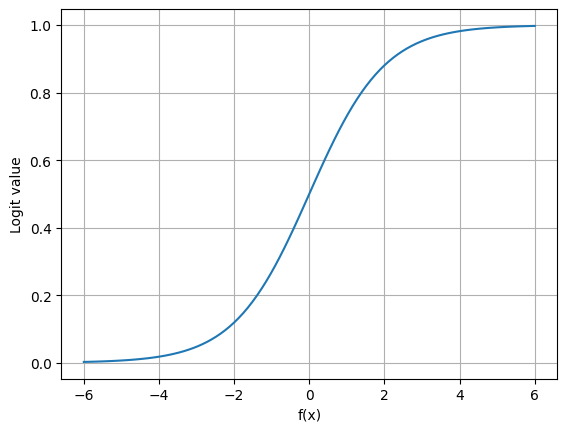

In [1]:
"""
Plot logit function
"""
#Sigmoid Function
import matplotlib.pyplot as plt
import numpy as np
import math
def logit(fx):
    return math.exp(fx)/(1+math.exp(fx))
fx = np.linspace(-6,6,100)
y = np.vectorize(logit)
plt.plot(fx,y(fx))
plt.xlabel('f(x)')
plt.ylabel('Logit value')
plt.grid()

[[118  12]
 [ 26  36]]
Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


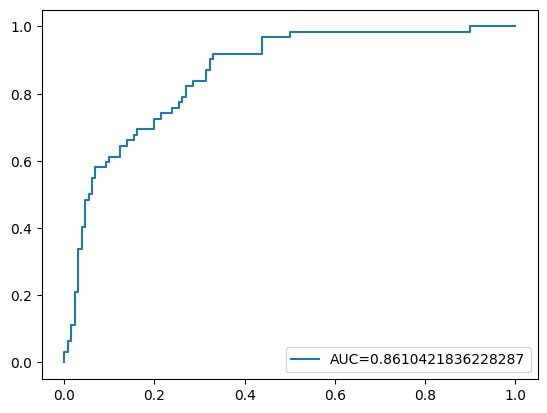

In [2]:
"""
Loading Data
"""
#import pandas
import pandas as pd
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# load dataset
pima = pd.read_csv('https://raw.githubusercontent.com/fabiorubenn/DatasetForWorkshop23/main/diabetes.csv', header=None, names=col_names)
pima = pima.iloc[1:]
"""
Selecting Feature
"""
#split dataset in desired features to be examined and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose',
                'BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable
"""
Splitting Data
"""
# split X and y into training and testing sets
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
"""
Model Development and Prediction
"""
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using default parameters with maximum of 1000 runs)
logreg = LogisticRegression(max_iter=1000)
# fit the model with data
logreg.fit(X_train,y_train)
# make predictions on the testing set
y_pred=logreg.predict(X_test)
"""
Model Evaluation
"""
from sklearn import metrics
y_test = [ int(s) for s in y_test]
y_pred = [ int(s) for s in y_pred]
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

#Decision tree

In [3]:
"""
Import libraries
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree
"""
Import the dataset
"""
iris = load_iris()
X = iris.data
y = iris.target
"""
Define the model
"""
clf = DecisionTreeClassifier()
"""
Train and validate the model using cross-validation
"""
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
"""
Train the model on the entire training set
"""
clf.fit(X, y)

Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean CV accuracy: 0.9533333333333334


DecisionTreeClassifier()

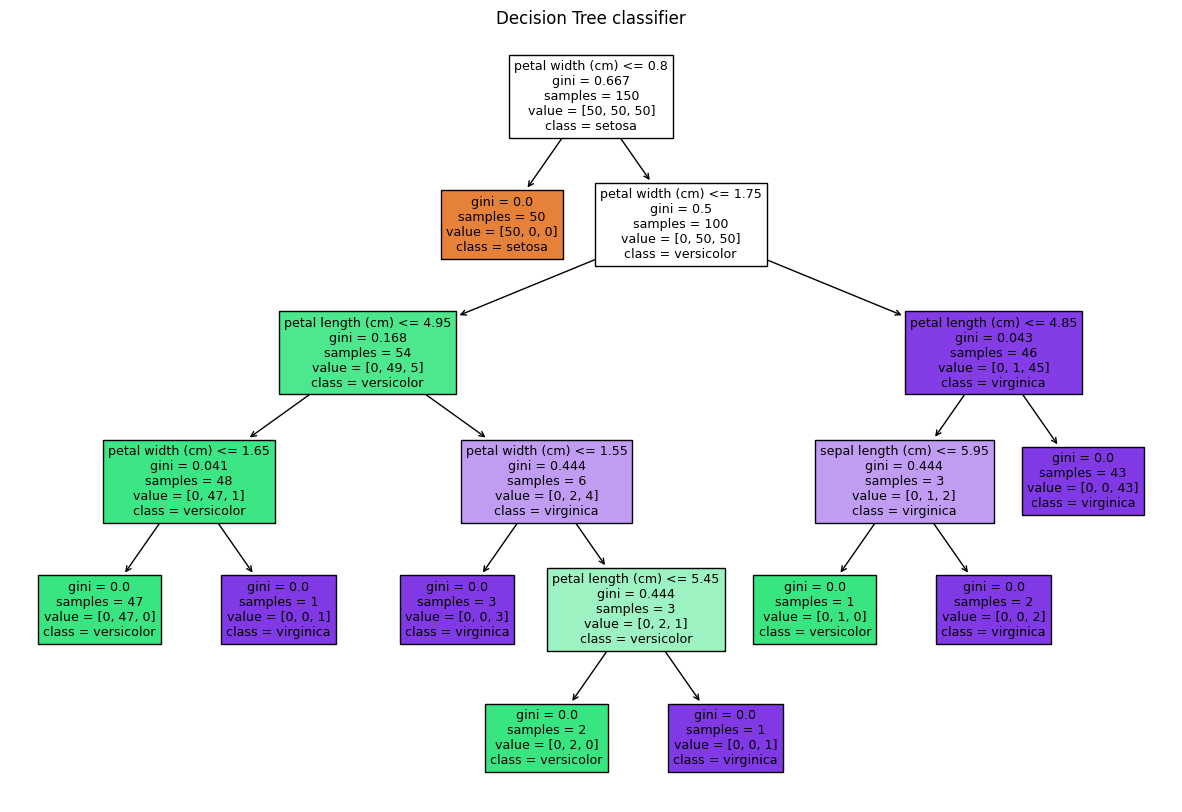

In [4]:
"""
Plot the decision tree
"""
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names,
          class_names=list(iris.target_names))
plt.title("Decision Tree classifier")
plt.show()

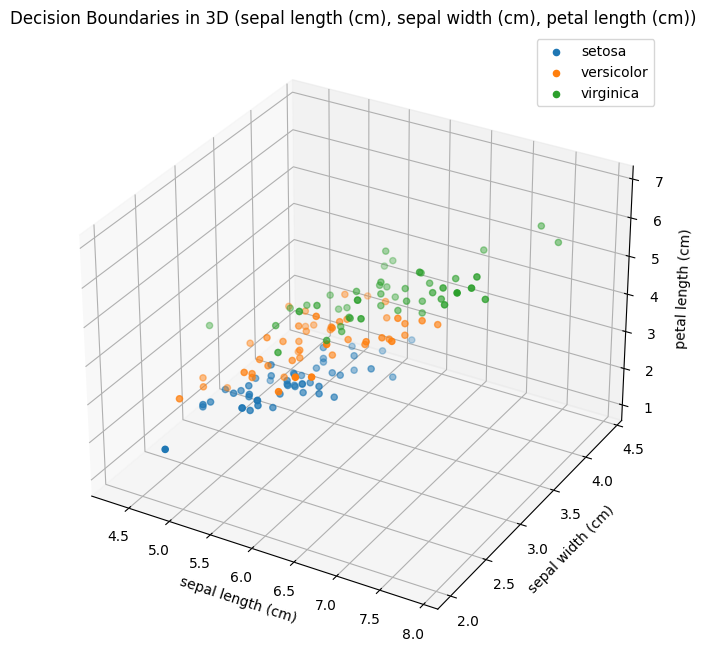

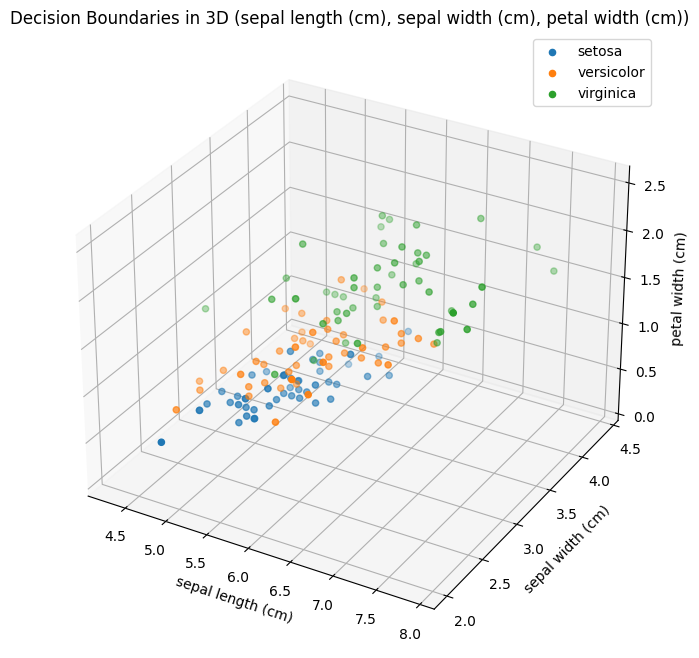

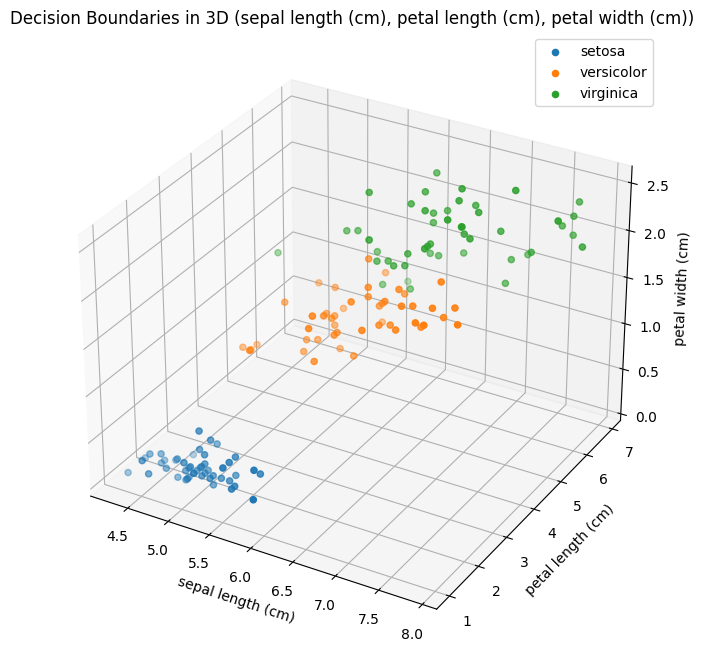

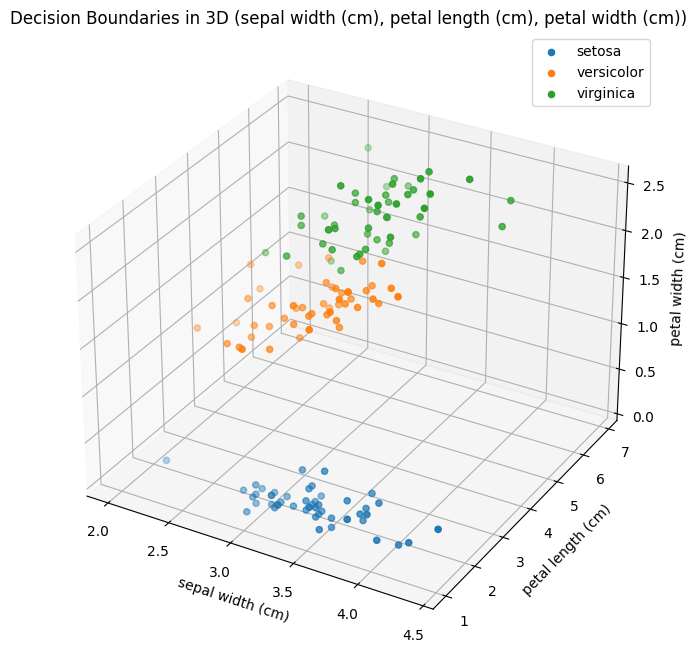

In [5]:
"""
Sow the decision boundries by first defining the feature triplets for plotting
"""
feature_triplets = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
triplet_names = [
    (iris.feature_names[i], iris.feature_names[j], iris.feature_names[k])
    for i, j, k in feature_triplets
]
"""
Create separate 3D plots for each feature triplet
"""
for i, (x_feature, y_feature, z_feature) in enumerate(triplet_names):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x_index, y_index, z_index = feature_triplets[i]
    X_triplet = X[:, [x_index, y_index, z_index]]
    #plot the data points
    for j, target_name in enumerate(iris.target_names):
        ax.scatter(
            X_triplet[y == j, 0],
            X_triplet[y == j, 1],
            X_triplet[y == j, 2],
            label=target_name,
        )
    #set the axis labels
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_zlabel(z_feature)
    ax.set_title(f"Decision Boundaries in 3D ({x_feature}, {y_feature}, {z_feature})")
    plt.legend()
    #show the plot
    plt.show()

#kNN

In [6]:
"""
Importing libraries
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
"""
Importing the dataset
"""
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
# Check the data
dataset.head()
"""
Preprocessing
"""
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
"""
Create training and test splits,
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
"""
Feature scaling
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""
Training and predictions
"""
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Mean Error')

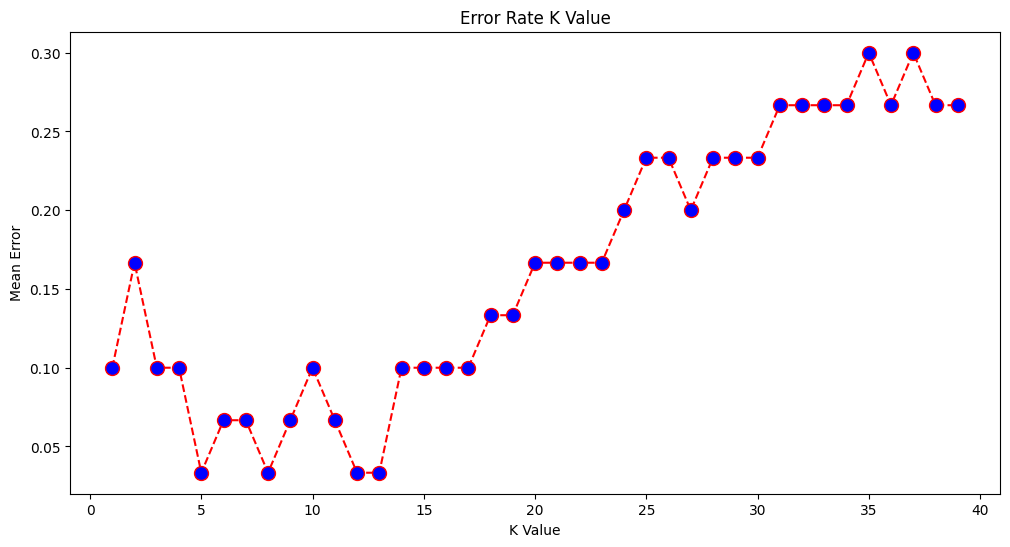

In [7]:
"""
Evaluating the algorithm
"""
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
"""
Comparing error rate with the K value
"""
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#SVM

In [14]:
"""
Importing libraries
"""
import pandas as pd
"""
Importing the dataset
"""
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
colnames=['sepal-length','sepal-width','petal-length','petal-width','Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
"""
Preprocessing
"""
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']
"""
Train Test Split
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
"""
Training the algorithm with Gaussian Kernel
"""
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
"""
Prediction and evaluation
"""
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 17  0]
 [ 0  0 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



<ipython-input-15-b3d7e23a92ec>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(svclassifier.support_vectors_[:, 0],
<ipython-input-15-b3d7e23a92ec>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1],  cmap=plt.cm.coolwarm,
<ipython-input-15-b3d7e23a92ec>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(svclassifier.support_vectors_[:, 0],
<ipython-input-15-b3d7e23a92ec>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 2],  cmap=plt.cm.coolwarm,
<ipython-input-15-b3d7e23a92ec>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(svclassifier.support_vectors_[:, 1],
<ipython-input-15-b3d7e23a92ec>:21: UserWarning: No data for colo

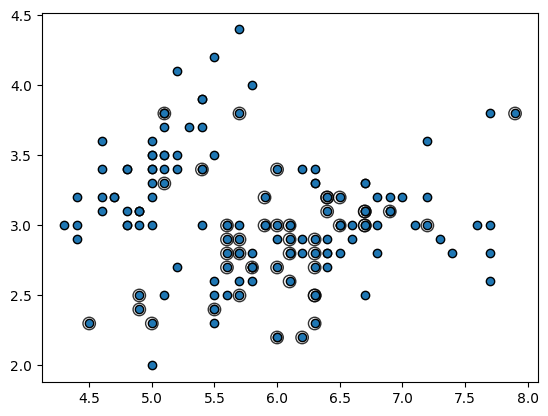

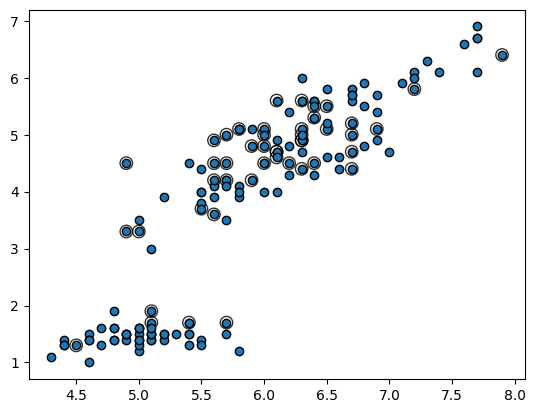

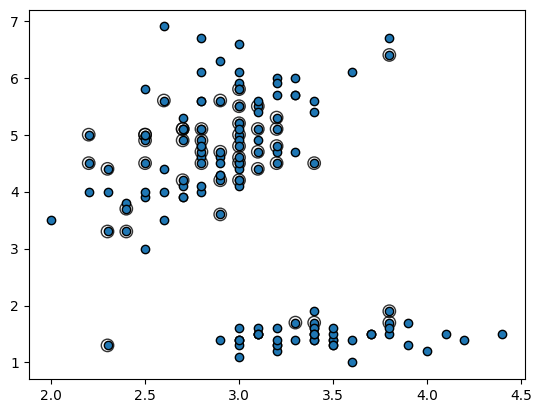

In [15]:
"""
Plot the suport vectors
"""
import matplotlib.pyplot as plt
plt.figure(0)
plt.scatter(svclassifier.support_vectors_[:, 0],
            svclassifier.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1],  cmap=plt.cm.coolwarm,
            edgecolors='k')
plt.figure(1)
plt.scatter(svclassifier.support_vectors_[:, 0],
            svclassifier.support_vectors_[:, 2], s=80,
            facecolors='none', edgecolors='k',cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 2],  cmap=plt.cm.coolwarm,
            edgecolors='k')
plt.figure(2)
plt.scatter(svclassifier.support_vectors_[:, 1],
            svclassifier.support_vectors_[:, 2], s=80,
            facecolors='none', edgecolors='k',cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X.to_numpy()[:, 1], X.to_numpy()[:, 2],  cmap=plt.cm.coolwarm,
            edgecolors='k')

#K-means

In [16]:
"""
Import libraries
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from itertools import combinations
"""
Import the dataset
"""
iris = load_iris()
X = iris.data
"""
Standardize the features
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
"""
Set the number of clusters
"""
n_clusters = 3
"""
Perform k-means clustering
"""
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
"""
Get silhouette scores for each sample
"""
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


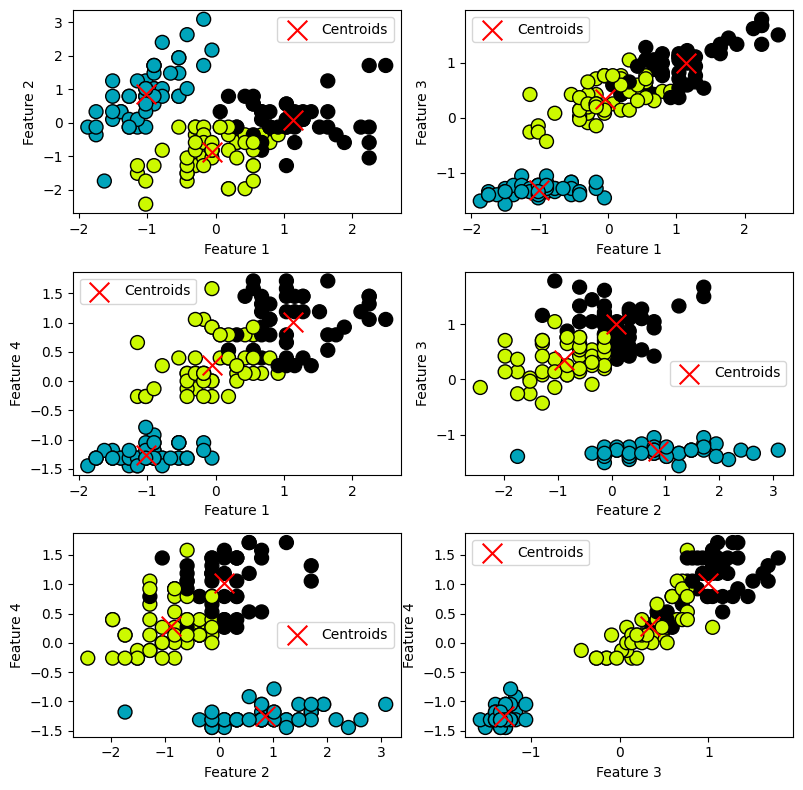

In [17]:
"""
Plot the clustering regions and the centroids for all 2D combinations
"""
#get all combinations of 2 features from the dataset
feature_combinations = list(combinations(range(X_scaled.shape[1]), 2))
#create subplots for all feature combinations
fig, axes = plt.subplots(len(feature_combinations) // 2, 2, figsize=(8, 8))
axes = axes.ravel()
for i, (feature1, feature2) in enumerate(feature_combinations):
    ax = axes[i]
    #plot the clustering regions in 2D for the current feature pair
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(
        X_scaled[:, feature1], X_scaled[:, feature2],
        marker='o', s=100, c=colors, edgecolor='k'
    )
    #plot the centroids of each cluster
    cluster_centers = kmeans.cluster_centers_
    ax.scatter(
        cluster_centers[:, feature1], cluster_centers[:, feature2],
        marker='x', s=200, c='red', label='Centroids'
    )
    ax.set_xlabel(f'Feature {feature1 + 1}')
    ax.set_ylabel(f'Feature {feature2 + 1}')
    ax.legend()
#adjust and show the subplots
plt.tight_layout()
plt.show()

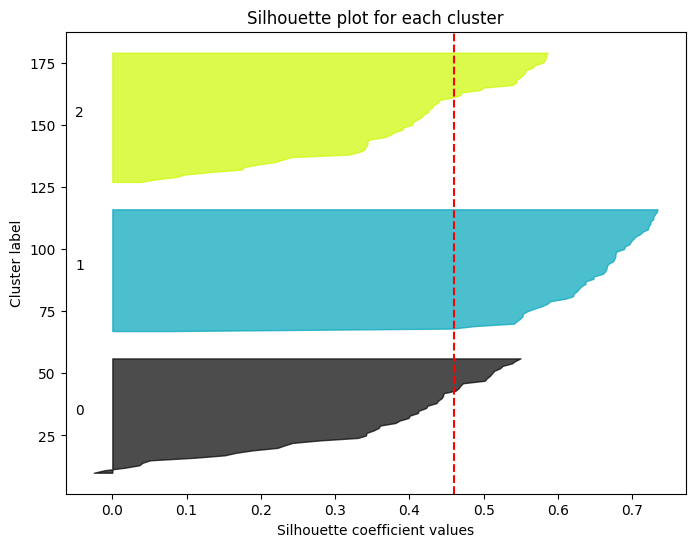

In [18]:
"""
Plot the silhouette scores for each sample
"""
plt.figure(figsize=(8, 6))
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0,
                      ith_cluster_silhouette_values, facecolor=color,
                      edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for each cluster")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

#ANN

In [27]:
"""
Import libraries
"""
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
"""
Import the dataset
"""
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
"""
Define the model
"""
nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000),
    alpha=0.01,
    early_stopping=True
)
"""
Train the model
"""
nn.fit(X_train, y_train)

MLPRegressor(alpha=0.01, early_stopping=True, hidden_layer_sizes=1000)

Rsquared value:  0.5330322202573605
RMSE:  0.7876456396571138


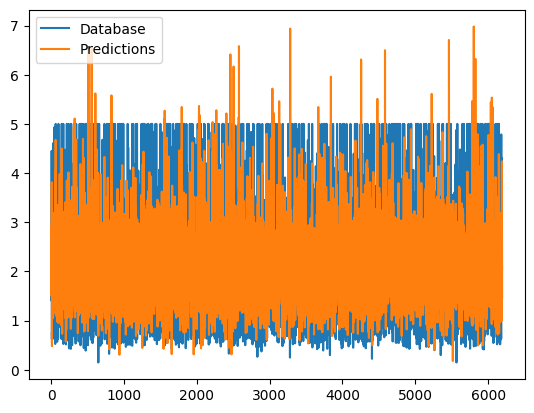

In [28]:
"""
Make predictions and estimate the error
"""
pred = nn.predict(X_test)
test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
print('Rsquared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
"""
Plot the predictions
"""
plt.plot(y_test, label = "Database")
plt.plot(pred, label = "Predictions")
plt.legend()
plt.show()